# Data Visualization on Airbnb New User Booking Dataset

In [74]:
import pandas as pd

In [75]:
!wget -O countries.csv https://raw.githubusercontent.com/shitalajagekar/DataScience/master/countries.csv

--2019-07-03 11:59:39--  https://raw.githubusercontent.com/shitalajagekar/DataScience/master/countries.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 632 [text/plain]
Saving to: ‘countries.csv’

100%[======================================>] 632         --.-K/s   in 0s      

2019-07-03 11:59:39 (109 MB/s) - ‘countries.csv’ saved [632/632]



In [76]:
!wget -O test.csv https://raw.githubusercontent.com/shitalajagekar/DataScience/master/train_users_2.csv

--2019-07-03 11:59:40--  https://raw.githubusercontent.com/shitalajagekar/DataScience/master/train_users_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24853881 (24M) [text/plain]
Saving to: ‘test.csv’

100%[======================================>] 24,853,881  67.7MB/s   in 0.4s   

2019-07-03 11:59:40 (67.7 MB/s) - ‘test.csv’ saved [24853881/24853881]



In [77]:
!ls

countries.csv  test.csv


In [78]:
df=pd.read_csv("countries.csv")

In [79]:
df2=pd.read_csv("test.csv")

In [80]:
df.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [81]:
df.shape

(10, 7)

In [82]:
df2.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [83]:
df2.shape

(213451, 16)

# Data Cleaning

In [84]:
df2.isnull().sum(axis=0)

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [85]:
df2=df2.drop(columns=['first_affiliate_tracked'],axis=1)
df2.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,Web,Mac Desktop,Chrome,US


In [86]:
df2.isnull().sum(axis=0)

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking        124543
gender                         0
age                        87990
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
signup_app                     0
first_device_type              0
first_browser                  0
country_destination            0
dtype: int64

In [87]:
age=df2['age'].mean()

In [88]:
print(age)

49.66833517985669


In [89]:
df2['age'].fillna(age,inplace=True)

In [90]:
df2.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,49.668335,facebook,0,en,direct,direct,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.000000,facebook,0,en,seo,google,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.000000,basic,3,en,direct,direct,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.000000,facebook,0,en,direct,direct,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.000000,basic,0,en,direct,direct,Web,Mac Desktop,Chrome,US


# Removing unknow value from Gender

In [91]:
df2=df2.drop(df2[df2['gender']=='-unknown-'].index)

In [92]:
df2=df2.drop(df2[df2['gender']=='OTHER'].index)

In [93]:
df2.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser,country_destination
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,Web,Mac Desktop,Firefox,other
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,Web,Mac Desktop,Safari,US


In [94]:
df2.shape

(117481, 15)

In [95]:
result=pd.merge(df,df2,how='outer',on=['country_destination','country_destination'])

In [96]:
result.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance,id,date_account_created,timestamp_first_active,...,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser
0,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,9kyyikfd0n,2010-07-13,20100713005813,...,MALE,37.000000,facebook,2,en,direct,direct,Web,Windows Desktop,IE
1,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,j37yqxs2mv,2010-07-17,20100717200206,...,MALE,44.000000,basic,2,en,direct,direct,Web,Windows Desktop,Chrome
2,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,7i1wc34vxj,2010-11-09,20101109013423,...,FEMALE,33.000000,facebook,3,en,direct,direct,Web,Mac Desktop,Chrome
3,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,nyuvzuxm15,2010-12-23,20101223071120,...,FEMALE,49.668335,basic,2,en,seo,google,Web,Other/Unknown,-unknown-
4,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,0utla8qada,2011-02-19,20110219055855,...,FEMALE,54.000000,basic,2,en,content,google,Web,Windows Desktop,IE


In [97]:
result.country_destination.unique()

array(['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NL', 'PT', 'US', 'NDF',
       'other'], dtype=object)

In [98]:
result=result.drop(result[result['country_destination']=='NDF' ].index)


In [99]:
result=result.drop(result[result['country_destination']=='other' ].index)

In [100]:
result.country_destination.unique()

array(['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NL', 'PT', 'US'], dtype=object)

In [101]:
country_dest=result.country_destination.value_counts()

In [102]:
country_dest.head()

US    42151
FR     3297
IT     1790
GB     1563
ES     1530
Name: country_destination, dtype: int64

# No. of peoples migratting to respective countries

In [103]:
import matplotlib.pyplot as plt

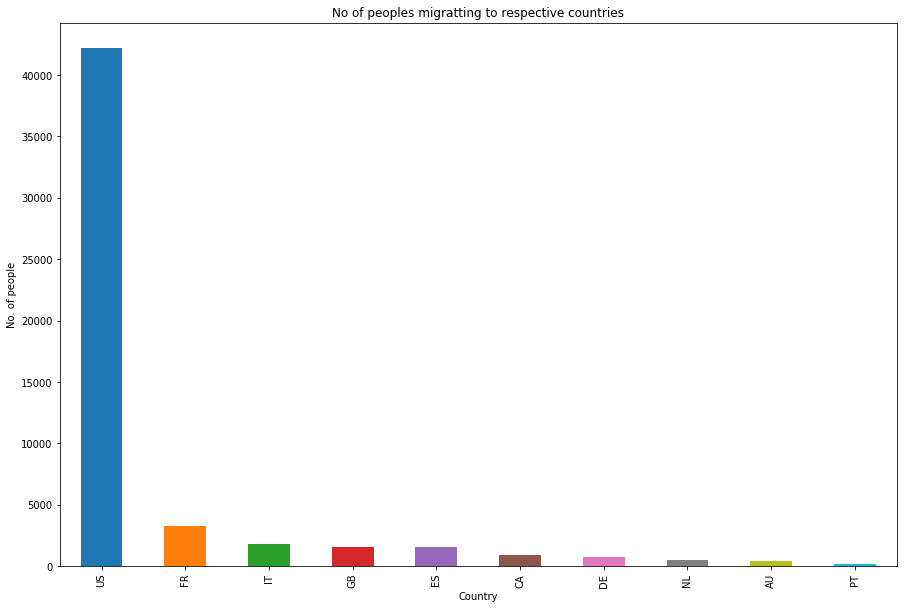

In [104]:
country_dest.plot(kind='bar',figsize=(15,10))
plt.title("No of peoples migratting to respective countries")
plt.xlabel("Country")
plt.ylabel("No. of people")
plt.show()

### The above figure show that  maximum peoples are migratting to US as compare to other countries

In [105]:
#country_dest.plot(kind='bar',figsize=(8,8))
#plt.title("No of peaple migratting to respective countries")
#plt.xlabel("Country")
#plt.ylabel("No. of people")
#count = 0
#for val in country_dest:
#    plt.annotate(val,xy=(val+60,count),color='black')
#    count=count+1
#plt.show()

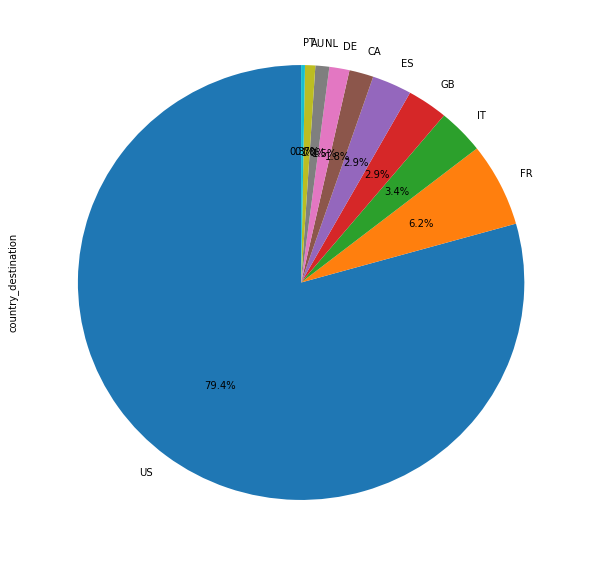

In [106]:
country_dest.plot(kind='pie',figsize=(10,10),startangle=90,autopct="%1.1f%%")

### The above figure show that 79.4% peoples are migratting US where as less persnet peoples are migratting to other counties

# Devise used to book  tickets

In [107]:
devise_usage=result.first_device_type.value_counts()

In [108]:
devise_usage

Mac Desktop           26667
Windows Desktop       17396
iPhone                 3922
iPad                   3121
Other/Unknown          1024
Android Phone           416
Desktop (Other)         319
Android Tablet          231
SmartPhone (Other)       15
Name: first_device_type, dtype: int64

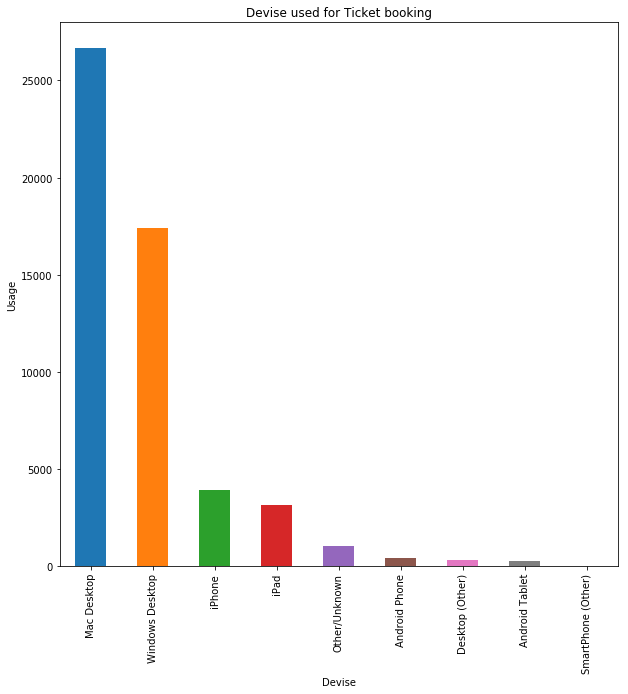

In [109]:
devise_usage.plot(kind='bar', figsize=(10,10))
plt.title("Devise used for Ticket booking")
plt.xlabel("Devise")
plt.ylabel("Usage")
plt.show()

### The above figure shows that Mac Desktop and Windows Desktop devices are mostly used to book the tickets

# Method used to book the tickets

In [110]:
book_Method=result.signup_method.value_counts()

In [111]:
book_Method   

basic       32529
facebook    20536
google         46
Name: signup_method, dtype: int64

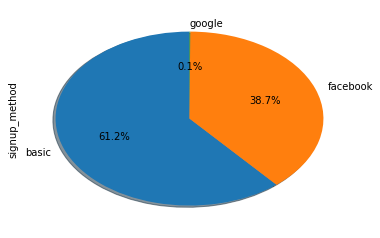

In [112]:
book_Method.plot(kind='pie',startangle=90,shadow=True,autopct="%1.1f%%")

### The above pie chart shows that 61.2% peoples are using basic methos to book tickets where as 38.7% are booking tickets using Facebook and less no. of peoples i.e. 0.1% peoples are using Google

# Representing Destination Countries on Map

In [113]:
!pip install folium

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


In [114]:
import folium


In [115]:
lat=-26.853388
long=133.27516

base = folium.Map(location=[lat,long], zoom_start=12)

incidents = folium.map.FeatureGroup()

inc_long = df['lat_destination']
inc_lat = df['lng_destination']
for i in range(10):
    incidents.add_child(
        folium.CircleMarker(
            [inc_lat[i],inc_long[i]],
            radius = 10,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
                  
)
)

base.add_child(incidents)

In [116]:
dates=result['date_first_booking'].unique()

In [117]:
dates

array(['2010-07-14', '2010-09-08', '2010-11-09', ..., '2015-06-26',
       '2015-06-25', '2015-06-28'], dtype=object)

In [118]:
result.date_first_booking.value_counts()

2014-06-11    139
2014-04-29    131
2014-06-05    131
2014-05-14    130
2014-06-10    129
2014-05-22    129
2014-06-19    125
2014-06-25    124
2014-05-19    123
2014-06-30    120
2014-04-11    120
2014-05-21    119
2014-06-18    119
2014-06-17    117
2014-05-20    116
2014-06-13    116
2014-05-02    115
2014-05-28    114
2014-01-17    112
2014-06-16    112
2014-06-03    110
2014-06-24    110
2014-06-20    109
2014-06-02    109
2014-06-06    109
2014-05-15    108
2014-06-26    107
2014-01-16    106
2014-01-15    106
2014-06-28    106
             ... 
2010-04-10      1
2010-06-14      1
2011-04-01      1
2011-04-02      1
2010-03-10      1
2010-01-10      1
2010-05-25      1
2010-06-18      1
2010-04-30      1
2010-02-26      1
2010-09-26      1
2011-02-22      1
2010-05-06      1
2010-06-08      1
2011-03-02      1
2010-07-28      1
2010-04-03      1
2010-09-14      1
2010-07-18      1
2010-01-13      1
2010-07-12      1
2010-09-09      1
2011-02-05      1
2010-08-07      1
2011-03-31

In [119]:
x=result.date_first_booking.value_counts().keys().tolist()
print(x)
y=result.date_first_booking.value_counts().tolist()
print(y)

['2014-06-11', '2014-04-29', '2014-06-05', '2014-05-14', '2014-06-10', '2014-05-22', '2014-06-19', '2014-06-25', '2014-05-19', '2014-06-30', '2014-04-11', '2014-05-21', '2014-06-18', '2014-06-17', '2014-05-20', '2014-06-13', '2014-05-02', '2014-05-28', '2014-01-17', '2014-06-16', '2014-06-03', '2014-06-24', '2014-06-20', '2014-06-02', '2014-06-06', '2014-05-15', '2014-06-26', '2014-01-16', '2014-01-15', '2014-06-28', '2014-03-24', '2014-05-16', '2014-06-27', '2014-05-06', '2014-05-01', '2014-05-05', '2014-04-01', '2014-05-07', '2014-05-30', '2014-06-23', '2014-05-12', '2014-05-23', '2014-05-08', '2014-05-17', '2014-01-18', '2014-04-15', '2014-04-25', '2014-06-09', '2014-06-12', '2014-04-22', '2014-04-09', '2014-03-12', '2014-04-16', '2014-05-09', '2014-05-27', '2014-06-15', '2014-04-24', '2014-04-23', '2014-02-12', '2014-04-18', '2014-05-13', '2014-03-19', '2014-06-04', '2013-05-14', '2014-04-28', '2014-04-03', '2014-04-30', '2014-07-01', '2013-07-02', '2014-04-21', '2014-04-08', '2014

In [120]:
import calendar
import datetime 
year = pd.DatetimeIndex(result['date_first_booking']).year

In [121]:
year1=set(year)
year1=list(year1)

In [122]:
year_count=[]
for y in year1:
    count=0
    for i in year:
        if i==y:
            count=count+1
    
    year_count.append(count)
print(year_count)  


[687, 3041, 11158, 18575, 18495, 1155]


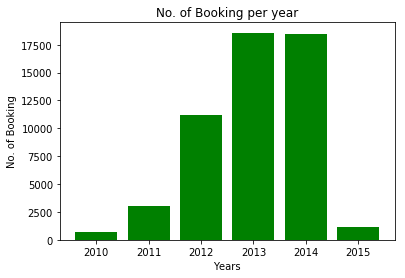

In [123]:
plt.bar(year1,year_count,color=['green'])
plt.title("No. of Booking per year")
plt.xlabel("Years")
plt.ylabel("No. of Booking")
plt.show()

### The above figure shows that in 2013 and 2014 more no. of peoples are travelling to other countries

In [124]:
result.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance,id,date_account_created,timestamp_first_active,...,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,signup_app,first_device_type,first_browser
0,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,9kyyikfd0n,2010-07-13,20100713005813,...,MALE,37.000000,facebook,2,en,direct,direct,Web,Windows Desktop,IE
1,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,j37yqxs2mv,2010-07-17,20100717200206,...,MALE,44.000000,basic,2,en,direct,direct,Web,Windows Desktop,Chrome
2,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,7i1wc34vxj,2010-11-09,20101109013423,...,FEMALE,33.000000,facebook,3,en,direct,direct,Web,Mac Desktop,Chrome
3,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,nyuvzuxm15,2010-12-23,20101223071120,...,FEMALE,49.668335,basic,2,en,seo,google,Web,Other/Unknown,-unknown-
4,AU,-26.853388,133.27516,15297.744,7741220.0,eng,0.0,0utla8qada,2011-02-19,20110219055855,...,FEMALE,54.000000,basic,2,en,content,google,Web,Windows Desktop,IE


# Frequently used Language

In [125]:
result.columns

Index(['country_destination', 'lat_destination', 'lng_destination',
       'distance_km', 'destination_km2', 'destination_language ',
       'language_levenshtein_distance', 'id', 'date_account_created',
       'timestamp_first_active', 'date_first_booking', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')

In [126]:
lang=result["destination_language "].value_counts().keys().tolist()
lang_counts=result["destination_language "].value_counts().tolist()

In [127]:
lang
lang_counts

[45041, 3297, 1790, 1530, 774, 532, 147]

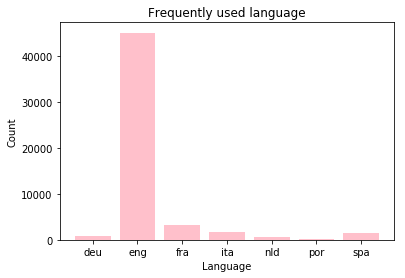

In [128]:
plt.bar(lang,lang_counts,color=['Pink'])
plt.title("Frequently used language")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

### From above graph we conclude that English language is used more as compare to other language. So English language is most popular language.

# How many Male and Females are Booking tickets

In [129]:
gender=result.gender.value_counts().keys().tolist()
gender_count=result.gender.value_counts().tolist()

In [130]:
index=['Male','Female']
gender_frame = pd.DataFrame({'gender': gender,'gender_count': gender_count},index=index)


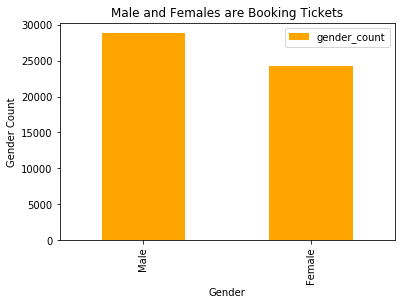

In [131]:
gender_frame.plot(kind='bar',color=['Orange'])
plt.title("Male and Females are Booking Tickets")
plt.xlabel("Gender")
plt.ylabel("Gender Count")
plt.show()

### From above graph we conclude that Male candidate are travelling more than Female candidate

# Affiliate Channels

In [132]:
affiliate_channel_frame=result.affiliate_channel.value_counts()

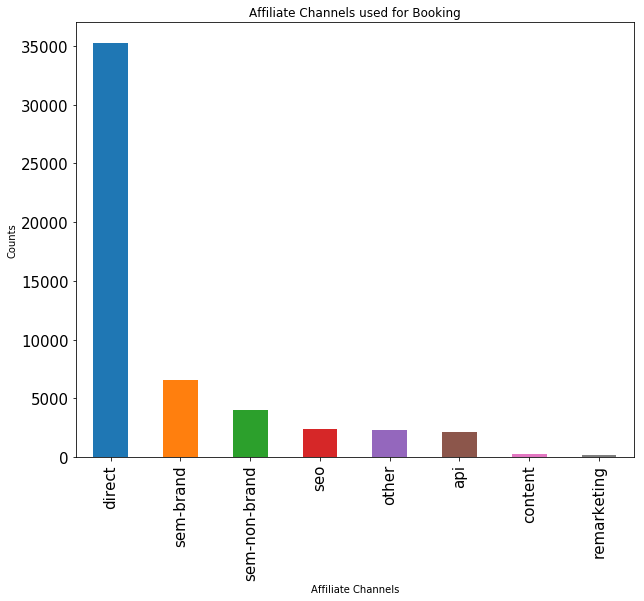

In [133]:
affiliate_channel_frame.plot(kind='bar',figsize=(10,8),fontsize=15)
plt.title("Affiliate Channels used for Booking")
plt.xlabel("Affiliate Channels")
plt.ylabel("Counts")
plt.show()

### The above fig shows that more no of peoples are booking the tickets by using their won wesite

In [134]:
result.signup_app.value_counts()


Web        47711
iOS         3440
Moweb       1261
Android      699
Name: signup_app, dtype: int64

In [148]:
signup_genderFrame=pd.DataFrame(columns=['signup_app','Male','Female'])

def count_Male_Female(appname,counter):
    male=0
    female=0
   
    for i in range(len(result)):
        if(result.loc[i,'signup_app']==appname and result.loc[i,'gender']=='MALE'):
            male=male+1
        if(result.loc[i,'signup_app']==appname and result.loc[i,'gender']=='FEMALE'):
            female=female+1
    signup_genderFrame.loc[counter,'signup_app']=appname
    signup_genderFrame.loc[counter,'Male']=male
    signup_genderFrame.loc[counter,'Female']=female
   

app=result.signup_app.value_counts().keys().tolist()
print(app)
counter=0
for i in app:
    count_Male_Female(i,counter)
    counter=counter+1

signup_genderFrame
   

['Web', 'iOS', 'Moweb', 'Android']


,signup_app,Male,Female
0,Web,21615,26096
1,iOS,1793,1647
2,Moweb,473,788
3,Android,397,302


In [151]:
signup_genderFrame.set_index('signup_app', inplace=True)

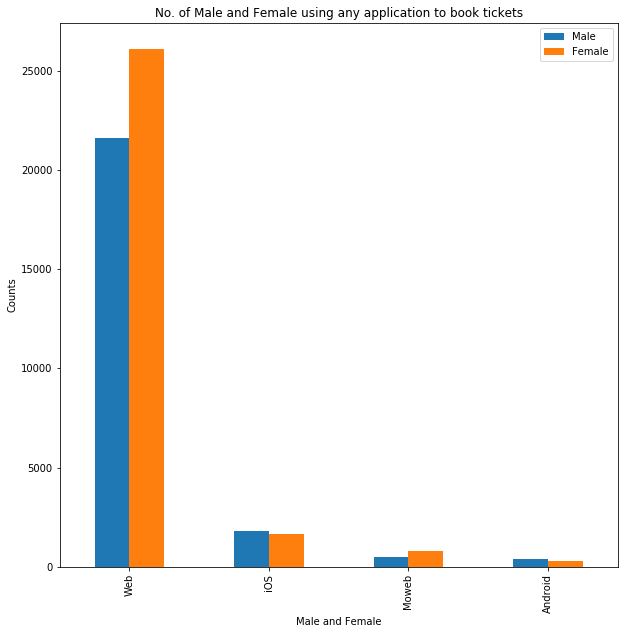

In [152]:
signup_genderFrame.plot(kind='bar',figsize=(10,10))
plt.title("No. of Male and Female using any application to book tickets")
plt.xlabel("Male and Female")
plt.ylabel("Counts")
plt.show()

# Correlation Matrix

In [ ]:
result.head()

In [ ]:
result.columns

In [ ]:
result.dtypes

In [ ]:
from sklearn.preprocessing import LabelEncoder
size_encoder=LabelEncoder()
size_encoder.fit(result['country_destination'].astype('str'))
result['country_destination']=size_encoder.transform(result['country_destination'].astype('str'))

In [ ]:
dest_lang_encoder=LabelEncoder()
dest_lang_encoder.fit(result['destination_language '].astype('str'))
result['destination_language ']=dest_lang_encoder.transform(result['destination_language '].astype('str'))

In [ ]:
id_encoder=LabelEncoder()
id_encoder.fit(result['id'].astype('str'))
result['id']=id_encoder.transform(result['id'].astype('str'))

In [ ]:
gender_encoder=LabelEncoder()
gender_encoder.fit(result['gender'].astype('str'))
result['gender']=gender_encoder.transform(result['gender'].astype('str'))

In [ ]:
lang_encoder=LabelEncoder()
lang_encoder.fit(result['language'].astype('str'))
result['language']=lang_encoder.transform(result['language'].astype('str'))

In [ ]:
signup_encoder=LabelEncoder()
signup_encoder.fit(result['signup_method'].astype('str'))
result['signup_method']=signup_encoder.transform(result ['signup_method'].astype('str'))

In [ ]:
affiliate_chnn_encoder=LabelEncoder()
affiliate_chnn_encoder.fit(result['affiliate_channel'].astype('str'))
result['affiliate_channel']=affiliate_chnn_encoder.transform(result['affiliate_channel'].astype('str'))

In [ ]:
affiliate_prov_encoder=LabelEncoder()
affiliate_prov_encoder.fit(result['affiliate_provider'].astype('str'))
result['affiliate_provider']=affiliate_prov_encoder.transform(result['affiliate_provider'].astype('str'))

In [ ]:
signup_app__encoder=LabelEncoder()
signup_app__encoder.fit(result['signup_app'].astype('str'))
result['signup_app']=signup_app__encoder.transform(result['signup_app'].astype('str'))

In [ ]:
first_dev_encoder=LabelEncoder()
first_dev_encoder.fit(result['first_device_type'].astype('str'))
result['first_device_type']=first_dev_encoder.transform(result['first_device_type'].astype('str'))

In [ ]:
first_bow_encoder=LabelEncoder()
first_bow_encoder.fit(result['first_browser'].astype('str'))
result['first_browser']=first_bow_encoder.transform(result['first_browser'].astype('str'))

In [ ]:
date_encoder=LabelEncoder()
date_encoder.fit(result['date_account_created'].astype('str'))
result['date_account_created']=date_encoder.transform(result['date_account_created'].astype('str'))

In [ ]:
result.head()

In [ ]:
import seaborn as sns
correlation_matrix=result.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix,annot=True,square=True,linewidths=.50)